# This script contains the following
    1.Importing Visualization Libraries and Data
    2. Data Cleaning
    3. Exploring Relationships
    4. Correlations
    5. Scatterplots
    6. Pair Plots
    7. ategorical Plots

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
path = r'C:\Users\klein\Achievement 6 Project- Advanced Analytics & Dashboard Design'

In [4]:
#importing players data
fifa_pl21 = pd.read_csv(os.path.join(path,'Data', 'Prepared Data', 'fifa21_playerratings.csv'), index_col = False)

In [5]:
fifa_pl21.head()

,Unnamed: 0,sofifa_id,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,player_rating,...,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,team_position,team_jersey_number,contract_valid_until
0,0,158023,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,...,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,CAM,10.0,2021.0
1,1,20801,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,...,220000,"ST, LW",Right,5,4,5,High/Low,LS,7.0,2022.0
2,2,200389,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,...,125000,GK,Right,3,3,1,Medium/Medium,GK,13.0,2023.0
3,3,188545,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,...,240000,ST,Right,4,4,4,High/Medium,ST,9.0,2023.0
4,4,190871,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,...,270000,"LW, CAM",Right,5,5,5,High/Medium,LW,10.0,2022.0


# Data Cleaning

In [6]:
fifa_pl21.shape

(18719, 22)

In [7]:
#Dropping the unnamed column
fifa_pl21.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
fifa_pl21.head()

,sofifa_id,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,player_rating,potential,...,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,team_position,team_jersey_number,contract_valid_until
0,158023,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,...,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,CAM,10.0,2021.0
1,20801,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,...,220000,"ST, LW",Right,5,4,5,High/Low,LS,7.0,2022.0
2,200389,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,...,125000,GK,Right,3,3,1,Medium/Medium,GK,13.0,2023.0
3,188545,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,...,240000,ST,Right,4,4,4,High/Medium,ST,9.0,2023.0
4,190871,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,...,270000,"LW, CAM",Right,5,5,5,High/Medium,LW,10.0,2022.0


# Exploratory analysis for the question: Does player with higher ratings receive more wages?

In [10]:
#Dropping the unneeded columns
fifa_pl21.columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'nationality',
       'club_name', 'league_name', 'league_rank', 'player_rating', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'team_position', 'team_jersey_number', 'contract_valid_until'],
      dtype='object')

In [12]:
fifa_pla_21 = fifa_pl21[['sofifa_id', 'age', 'height_cm', 'weight_kg', 'nationality','league_rank', 'player_rating', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'work_rate', 'international_reputation']]

In [13]:
fifa_pla_21.head()

,sofifa_id,age,height_cm,weight_kg,nationality,league_rank,player_rating,potential,value_eur,wage_eur,player_positions,preferred_foot,work_rate,international_reputation
0,158023,33,170,72,Argentina,1.0,93,93,67500000,560000,"RW, ST, CF",Left,Medium/Low,5
1,20801,35,187,83,Portugal,1.0,92,92,46000000,220000,"ST, LW",Right,High/Low,5
2,200389,27,188,87,Slovenia,1.0,91,93,75000000,125000,GK,Right,Medium/Medium,3
3,188545,31,184,80,Poland,1.0,91,91,80000000,240000,ST,Right,High/Medium,4
4,190871,28,175,68,Brazil,1.0,91,91,90000000,270000,"LW, CAM",Right,High/Medium,5


# Exploring Relationships

Correlation matrix:

In [14]:
#create a correlation matrix using pandas
fifa_pla_21.corr()

,sofifa_id,age,height_cm,weight_kg,league_rank,player_rating,potential,value_eur,wage_eur,international_reputation
sofifa_id,1.000000,-0.761038,-0.107532,-0.208639,-0.027882,-0.490723,0.017739,-0.178214,-0.255926,-0.380546
age,-0.761038,1.000000,0.089319,0.240576,-0.068528,0.468749,-0.262806,0.090363,0.163486,0.276691
height_cm,-0.107532,0.089319,1.000000,0.772011,0.061233,0.031799,-0.011047,0.004202,0.022583,0.038921
weight_kg,-0.208639,0.240576,0.772011,1.000000,0.005947,0.146086,-0.024357,0.045669,0.062599,0.090488
league_rank,-0.027882,-0.068528,0.061233,0.005947,1.000000,-0.217090,-0.170330,-0.144325,-0.136363,-0.094535
player_rating,-0.490723,0.468749,0.031799,0.146086,-0.217090,1.000000,0.635696,0.637120,0.580928,0.443587
potential,0.017739,-0.262806,-0.011047,-0.024357,-0.170330,0.635696,1.000000,0.575543,0.477673,0.309951
value_eur,-0.178214,0.090363,0.004202,0.045669,-0.144325,0.637120,0.575543,1.000000,0.839755,0.567733
wage_eur,-0.255926,0.163486,0.022583,0.062599,-0.136363,0.580928,0.477673,0.839755,1.000000,0.618242
international_reputation,-0.380546,0.276691,0.038921,0.090488,-0.094535,0.443587,0.309951,0.567733,0.618242,1.000000


# Create a correlation heatmap using seaborn

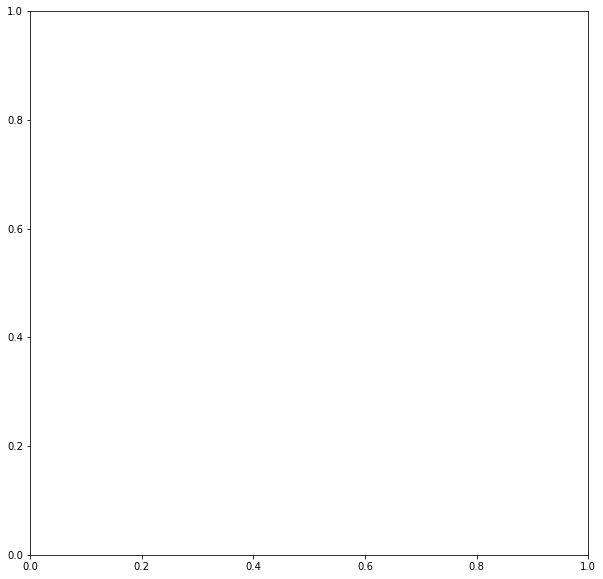

In [15]:
#creating subplot
f,ax = plt.subplots(figsize=(10,10))

In [16]:
corr = sns.heatmap(fifa_pla_21.corr(), annot = True, ax = ax)

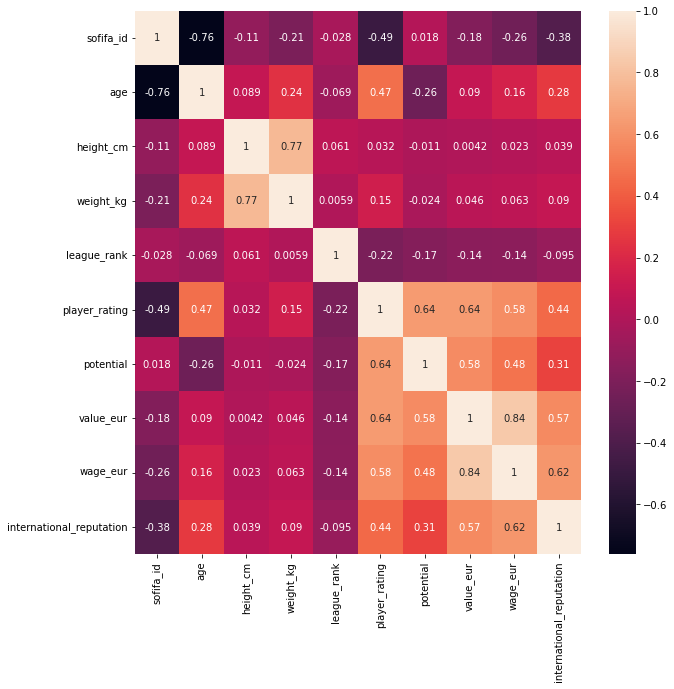

In [17]:
corr.figure

Players ratings have a medium to strong relationship of 0.58 on the wages whereas value_euro have the strongest correlation of 0.84

Note: looking at the potential versus player ratings, there is a strong relationship as well, explaining further how this also have an impact on the ratings

# Scatterplots

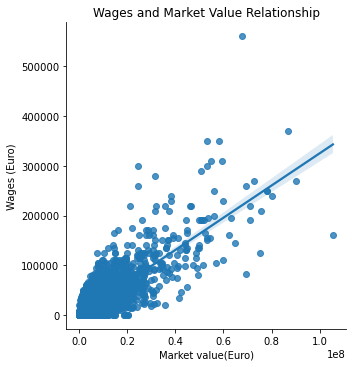

In [20]:
#create a scatterplot for the "player ratings" and "wages" columns in seaborn
sns.lmplot(x = 'value_eur', y = 'wage_eur', data = fifa_pla_21)
plt.xlabel('Market value(Euro)')
plt.ylabel('Wages (Euro)')
plt.title('Wages and Market Value Relationship')
plt.show()

The plot shows a positive correlation between the variables, the data points are closer to the trend lines as it travels upwards diagonally from left to right. Thus, indicating a strong correlation

# Pair Plots:

In [21]:
fifa_pla_21.columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'nationality',
       'league_rank', 'player_rating', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'work_rate',
       'international_reputation'],
      dtype='object')

In [22]:
#Taking only into account the variables to be used in the pair plot
fifa_21_pairplot = fifa_pla_21[['age', 'height_cm', 'weight_kg','player_rating', 'potential', 'value_eur', 'wage_eur']]

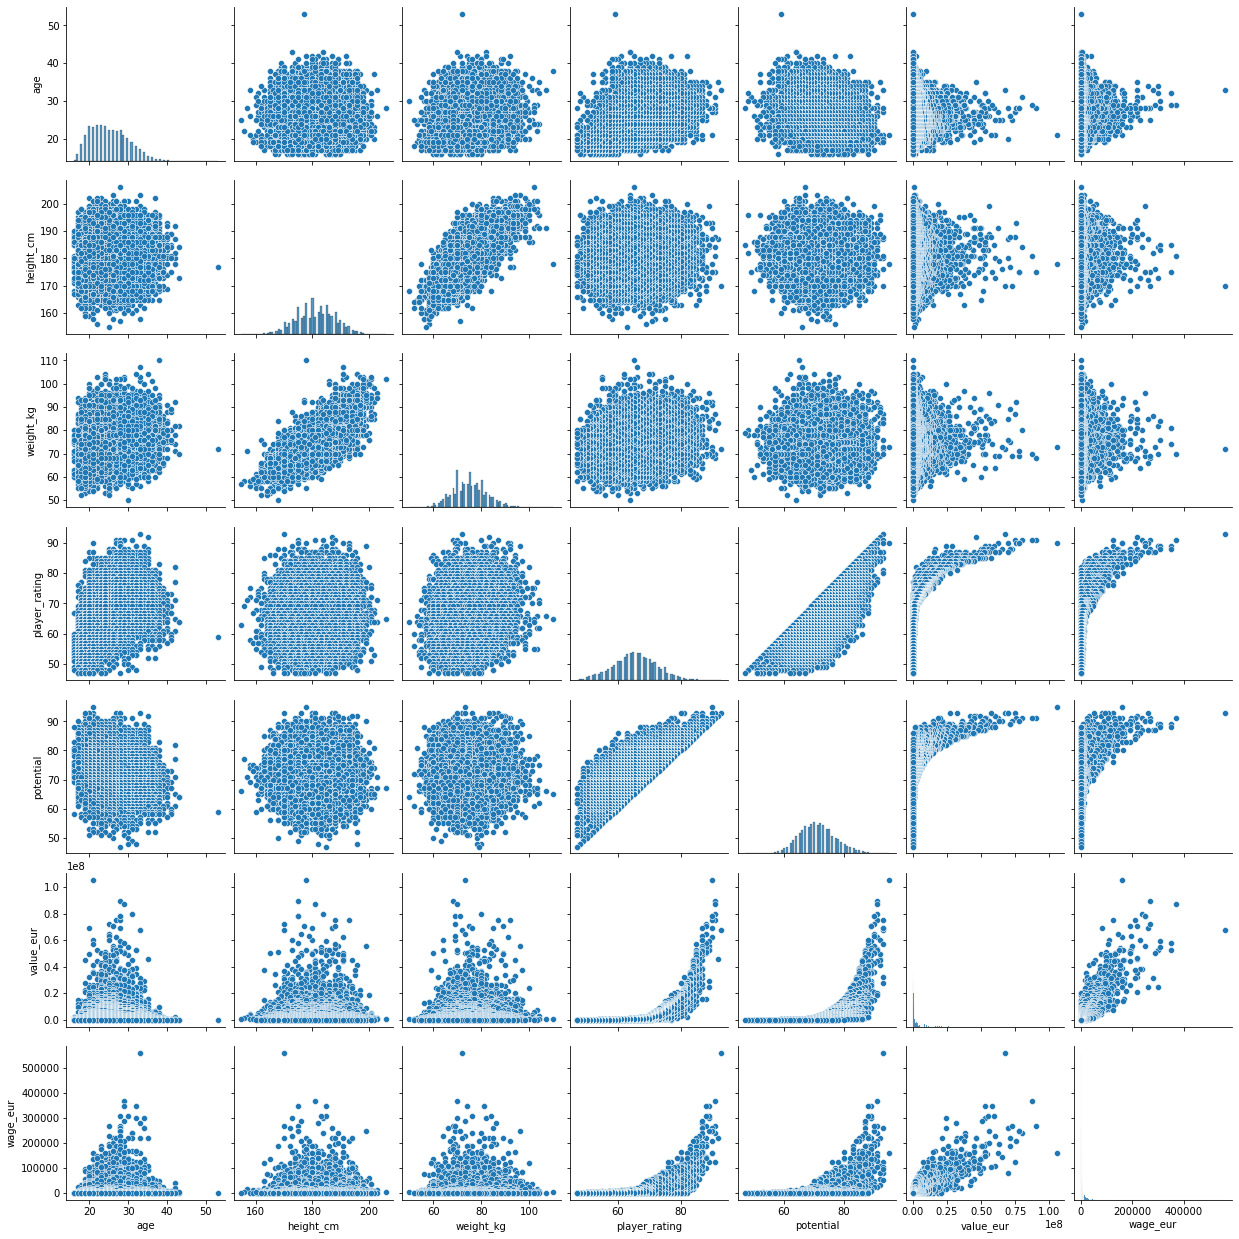

In [23]:
#create a pair plot
g = sns.pairplot(fifa_21_pairplot)

The scatterplots of wages vs player_rating, value in euro and also potential including height vs weight shows a closer relationship pertaining to what we have discovered earlier on the previous charts. More analysis can be delve into to understand the relationship between these variables.

# Categorical Plots:
creating a categorical variable that splits the player ratings column into categories

In [24]:
#using histogram to visualize the distribution of the variables. This way, a sensible cartegories for the rating can be determine 

C:\Users\klein\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='player_rating', ylabel='Density'>

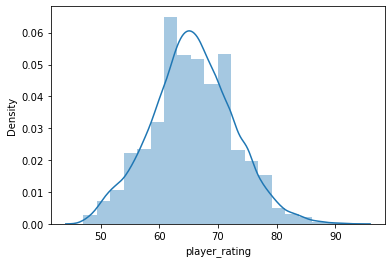

In [27]:
sns.distplot(fifa_pla_21['player_rating'], bins = 20)

In [29]:
fifa_pla_21['player_rating'].describe()

count    18719.000000
mean        65.635023
std          7.003908
min         47.000000
25%         61.000000
50%         66.000000
75%         70.000000
max         93.000000
Name: player_rating, dtype: float64

In [30]:
#Group player ratings
fifa_pla_21.loc[fifa_pla_21['player_rating'] < 65, 'Rating Level'] = 'Low rating'
fifa_pla_21.loc[(fifa_pla_21['player_rating'] >= 65) & (fifa_pla_21['player_rating'] < 80), 'Rating Level'] = 'Average rating'
fifa_pla_21.loc[fifa_pla_21['player_rating'] >= 80, 'Rating Level'] = 'High rating'

C:\Users\klein\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\klein\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [31]:
fifa_pla_21['Rating Level'].value_counts(dropna = False)

Average rating    10065
Low rating         8162
High rating         492
Name: Rating Level, dtype: int64

In [33]:
fifa_pla_21.columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'nationality',
       'league_rank', 'player_rating', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'work_rate',
       'international_reputation', 'Rating Level'],
      dtype='object')

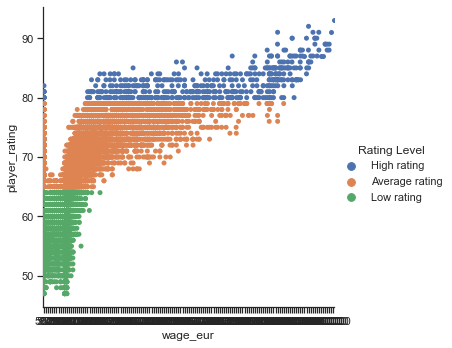

In [37]:
#create a categorical plot in seaborn using the "Rating Level" column that was created
sns.set(style='ticks')
g = sns.catplot(x='wage_eur', y='player_rating', hue='Rating Level', data=fifa_pla_21)

To answer the question: 
Do player with higher ratings receive more wages?

with the exploratory analysis that was performed, I have been able to formulate the hypothesis: 
If player have a higher rating then they receive higher wages
If player have a higher market value then their wages will be higer.


Note: More hypothesis can also be formulated based on their potential since there is a strong relationship with Player_rating

In [39]:
#Export the data with player count
fifa_pla_21.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'fifa_21_ratinglevel.csv'))